In [137]:
import pandas as pd


#Importando CSVs p/ Pandas
df = pd.read_csv('credit.csv')
query1 = pd.read_csv('../projeto/querys/query1.csv')
query2 = pd.read_csv('../projeto/querys/query1.csv')

In [139]:
df

,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3.1,1,12691.51,1144.90,42
0,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
1,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
2,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
3,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
4,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,34,M,1,na,casado,$60K - $80K,blue,3,3,2,3890.30,1889.41,51
2559,55,M,3,mestrado,solteiro,$80K - $120K,blue,6,3,2,17198.56,4042.73,62
2560,53,M,4,ensino medio,casado,$120K +,blue,6,4,3,3401.79,1924.55,54
2561,37,M,1,na,casado,$60K - $80K,blue,6,2,1,18951.70,2874.56,58


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   45            2563 non-null   int64  
 1   M             2563 non-null   object 
 2   3             2563 non-null   int64  
 3   ensino medio  2563 non-null   object 
 4   casado        2563 non-null   object 
 5   $60K - $80K   2563 non-null   object 
 6   blue          2563 non-null   object 
 7   5             2563 non-null   int64  
 8   3.1           2563 non-null   int64  
 9   1             2563 non-null   int64  
 10  12691.51      2563 non-null   float64
 11  1144.90       2563 non-null   float64
 12  42            2563 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 260.4+ KB


# **Análise Exploratória dos Dados de Crédito com SQL**

## Conhecendo os Dados

Esses dados trazem um retrato dos clientes de um banco, oferecendo uma visão valiosa sobre seu perfil de consumo e características financeiras. Aqui estão as colunas disponíveis no dataset:

* **idade** - Idade do cliente, um fator essencial para entender comportamentos financeiros e riscos.
* **sexo** - Sexo do cliente, identificado como 'F' para feminino e 'M' para masculino.
* **dependentes** - Número de dependentes financeiros do cliente, um indicador de suas responsabilidades e possíveis necessidades de crédito.
* **escolaridade** - Nível de escolaridade do cliente, que pode influenciar decisões financeiras e acesso a produtos bancários.
* **salario_anual** - Faixa salarial, agrupando os clientes em intervalos de renda que ajudam a entender a capacidade de consumo.
* **tipo_cartao** - Tipo de cartão de crédito do cliente, que nos dá pistas sobre os diferentes perfis de consumidores e suas preferências.
* **qtd_produtos** - Quantidade de produtos adquiridos nos últimos 12 meses, útil para medir o engajamento do cliente com os serviços do banco.
* **iteracoes_12m** - Número de interações ou transações realizadas nos últimos 12 meses, uma métrica para avaliar a atividade financeira recente do cliente.
* **meses_inativo_12m** - Meses em que o cliente esteve inativo no último ano, útil para identificar clientes menos engajados.
* **limite_credito** - Limite de crédito do cliente, uma informação crucial para análise de risco.
* **valor_transacoes_12m** - Valor total das transações feitas nos últimos 12 meses, refletindo o poder de compra e uso de crédito.
* **qtd_transacoes_12m** - Quantidade de transações realizadas, ajudando a entender a frequência de uso dos serviços.

Esses dados foram organizados em uma tabela no **AWS Athena**, aproveitando a estrutura de um **S3 Bucket**. Para mais detalhes sobre o dataset original, acesse: [Dataset EBAC](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset).

---

Essa estrutura de dados vai nos guiar em uma exploração inicial, ajudando a levantar questões e insights sobre o perfil de crédito dos clientes e suas interações com o banco. Vamos começar nossa análise!


## **Criando o Bucket no S3 e Importando o Arquivo `credit.csv`**

Antes de começar a realizar consultas no Athena, eu precisei garantir que os dados estivessem disponíveis no **Amazon S3**. Para isso, segui os seguintes passos para criar o bucket e importar o arquivo `credit.csv`.

### 1. Criando o Bucket no S3

1. Acessei o [AWS Management Console](https://aws.amazon.com/console/).
2. Naveguei até o **Amazon S3** e cliquei em **Create bucket**.
3. Escolhi o nome `projeto-sql-ebac-leone` para o bucket. Lembrei que o nome do bucket precisa ser único globalmente.
4. Selecionei a região onde o bucket seria criado, preferi escolher a mesma região onde o Athena estava configurado para otimizar o desempenho.
5. Cliquei em **Create** para criar o bucket.

### 2. Carregando o Arquivo `credit.csv` no Bucket

1. Depois de criar o bucket, entrei nele clicando no nome do bucket `projeto-sql-ebac-leone`.
2. Cliquei em **Upload** e depois em **Add files**.
3. Selecionei o arquivo `credit.csv` do meu computador para carregar no bucket.
4. Após selecionar o arquivo, cliquei em **Upload** para concluir o processo. 

Agora, o arquivo `credit.csv` estava disponível no meu bucket S3, pronto para ser utilizado nas consultas no AWS Athena.

### 3. Configurando o Athena para Usar o Bucket

1. O primeiro passo foi acessar o **AWS Athena**.
2. Escolhi o banco de dados desejado ou criei um novo.
3. Usei a seguinte consulta SQL para criar uma tabela que apontasse para o arquivo `credit.csv` no meu bucket:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito ( 
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string, 
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ',' 
) LOCATION 's3://projeto-sql-ebac-leone/credit.csv'
TBLPROPERTIES ('has_encrypted_data'='false');


## **Exploração de Dados:**

O primeiro passo da nossa análise é entender o que temos nas mãos, ou seja, explorar os dados. Vamos ver o que encontramos!

### **Quantas informações temos na nossa base de dados?**

Executo a seguinte consulta para descobrir o número de registros na base:

```sql
SELECT count(*) FROM credito
#	_col0
1	2564



## Resultados da Query

Aqui está a imagem gerada pela query SQL `SELECT count(*) FROM credito`:

![Resultado da Query](../projeto/imagens/SELECT_count_FROM_credito.png)


## Exibição dos Primeiros 10 Registros da Tabela `credito`

Para começar nossa análise, executei a seguinte query no AWS Athena para visualizar os primeiros 10 registros da tabela `credito`:

```sql
SELECT * FROM credito LIMIT 10;


In [150]:
query1

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


## Estrutura da Tabela `credito`

Para começar a entender melhor a estrutura dos dados com os quais vamos trabalhar, executei a query `DESCRIBE credito`. Esse comando me permite ver todas as colunas disponíveis, junto com o tipo de dado de cada uma delas. Aqui está o que encontrei:

| Coluna               | Tipo de Dados      | Descrição                                 |
|----------------------|--------------------|-------------------------------------------|
| **idade**            | int                | Idade do cliente                          |
| **sexo**             | string             | Sexo do cliente                           |
| **dependentes**      | int                | Número de dependentes do cliente          |
| **escolaridade**     | string             | Nível de escolaridade do cliente          |
| **estado_civil**     | string             | Estado civil do cliente                   |
| **salario_anual**    | string             | Faixa salarial anual do cliente           |
| **tipo_cartao**      | string             | Tipo de cartão do cliente                 |
| **qtd_produtos**     | bigint             | Quantidade de produtos adquiridos         |
| **iteracoes_12m**    | int                | Número de transações nos últimos 12 meses |
| **meses_inativo_12m**| int                | Meses de inatividade nos últimos 12 meses |
| **limite_credito**   | float              | Limite de crédito do cliente              |
| **valor_transacoes_12m** | float          | Valor total das transações nos últimos 12 meses |
| **qtd_transacoes_12m** | int              | Quantidade de transações nos últimos 12 meses |

Esses campos cobrem uma série de informações importantes sobre o perfil financeiro dos clientes, desde características pessoais (como idade e sexo) até dados financeiros detalhados (como limite de crédito e valor das transações). Para trabalharmos com modelos em Python elas também nos dão informações sobre os tipos de dados e schema que estamos lidando.


Com essa estrutura clara em mente, agora posso começar a aprofundar nas análises e responder a perguntas específicas sobre os dados.


## Resultados da Query DESCRIBE

Aqui está a imagem gerada pela query SQL `DESCRIBE credito`:

![Resultado da Query](../projeto/imagens/describe_credito.png)

## Análise de Escolaridade dos Clientes

Para entender melhor o nível de escolaridade dos clientes na nossa base de dados, executei a query `SELECT DISTINCT escolaridade FROM credito`. Esse comando traz todas as categorias únicas encontradas na coluna `escolaridade`, revelando uma visão geral das diferentes faixas educacionais representadas. Aqui estão os resultados obtidos:

| #  | Escolaridade           |
|----|-------------------------|
| 1  | sem educação formal     |
| 2  | ensino médio            |
| 3  | mestrado                |
| 4  | graduação               |
| 5  | doutorado               |
| 6  | na                      |

A variedade de escolaridade nos mostra que temos clientes desde aqueles sem educação formal até os que possuem pós-graduação, incluindo mestrado e doutorado. Observamos também a presença de registros com valores "na", indicando que a informação de escolaridade pode estar ausente em alguns casos. Essa diversidade nos ajuda a entender melhor a base de clientes e pode ser útil para análises segmentadas no futuro.


## Distribuição de Escolaridade dos Clientes

Para visualizar as categorias únicas de escolaridade presentes na nossa base de dados, gerei uma imagem da query `SELECT DISTINCT escolaridade FROM credito`. Abaixo, é possível ver os diferentes níveis de escolaridade registrados na tabela.

![Distribuição de Escolaridade dos Clientes](../projeto/imagens/SELECT_DISTINCT_escolaridade_FROM_credito.png)


## Distribuição de Faixas Salariais dos Clientes

Para entender a distribuição dos clientes nas diferentes faixas salariais, utilizei a query `SELECT count(*), salario_anual FROM credito GROUP BY salario_anual`. Esse comando nos permite ver quantos clientes se encaixam em cada faixa salarial presente na base de dados. Abaixo estão os resultados:

| #  | Quantidade de Clientes | Faixa Salarial      |
|----|-------------------------|---------------------|
| 1  | 451                     | $60K - $80K        |
| 2  | 467                     | $40K - $60K        |
| 3  | 222                     | $120K +            |
| 4  | 488                     | $80K - $120K       |
| 5  | 701                     | Menos que $40K     |
| 6  | 235                     | na                 |

Observando esses dados, notamos que a maioria dos clientes possui um salário anual inferior a $ 40 K,  enquanto uma parcela menor se encontra na faixa mais alta, acima de $120K . É interessante também observar que existem alguns registros sem valor para essa variável, identificados como "na". Esses valores podem indicar dados ausentes, que podem exigir um tratamento adequado nas análises futuras.


## Distribuição de Faixas Salariais dos Clientes

Abaixo, está a representação visual da distribuição das faixas salariais dos clientes, gerada com a query `SELECT count(*), salario_anual FROM credito GROUP BY salario_anual`. Essa visualização facilita a compreensão de como os clientes se distribuem entre as diferentes faixas de renda.

![Distribuição de Faixas Salariais](../projeto/imagens/select_count()_salario_anual_from_credito_group_by_salario_anual.png)


## Distribuição de Clientes por Sexo

Abaixo está a visualização da distribuição dos clientes por sexo, obtida através da query `SELECT count(), sexo FROM credito GROUP BY sexo`. Essa imagem nos ajuda a entender a proporção de clientes femininos e masculinos presentes na base de dados.

![Distribuição de Clientes por Sexo](../projeto/imagens/select_count_sexo_from_credito_group_by_sexo.png)


## Distribuição de Clientes por Sexo

Para analisar a proporção de clientes por sexo, executei a query `SELECT count(), sexo FROM credito GROUP BY sexo`. Essa consulta nos mostra quantos clientes de cada sexo estão presentes na nossa base de dados. Abaixo estão os resultados:

| #  | Quantidade de Clientes | Sexo |
|----|-------------------------|------|
| 1  | 1001                   | F    |
| 2  | 1563                   | M    |

Esses dados indicam que há uma maior quantidade de clientes masculinos (1563) em comparação aos clientes femininos (1001) na base de dados.

## Explorando os Maiores Limites de Crédito

Curioso sobre os clientes que possuem os maiores limites de crédito, decidi realizar uma consulta que me ajudasse a visualizar essa relação com o perfil demográfico de cada cliente. Minha ideia era identificar quais combinações de escolaridade, tipo de cartão e sexo se destacavam entre os maiores limites.

Para isso, eu utilizei uma query que traz, de forma ordenada, os 10 maiores limites de crédito, excluindo registros sem informação de escolaridade ou tipo de cartão. Assim, fui capaz de observar com mais clareza como essas variáveis se distribuem nos maiores valores de crédito.

A consulta me deu alguns insights interessantes! No topo da lista, encontrei clientes com escolaridade variada, desde "sem educação formal" até "doutorado". Isso sugere que o limite de crédito não está estritamente associado ao nível de escolaridade. Além disso, vi que os clientes com maiores limites estão distribuídos entre os tipos de cartão blue, gold, platinum e silver, com uma leve predominância masculina.

Abaixo, está o ranking dos 10 clientes com os maiores limites de crédito, de acordo com o perfil demográfico.

| #  | Limite de Crédito | Escolaridade          | Tipo de Cartão | Sexo |
|----|--------------------|-----------------------|----------------|------|
| 1  | 34516.99          | sem educação formal   | blue          | M    |
| 2  | 34516.98          | mestrado              | gold          | M    |
| 3  | 34516.97          | mestrado              | blue          | M    |
| 4  | 34516.96          | doutorado             | platinum      | F    |
| 5  | 34516.96          | sem educação formal   | silver        | M    |
| 6  | 34516.95          | ensino médio          | gold          | M    |
| 7  | 34516.94          | graduação             | gold          | F    |
| 8  | 34516.94          | graduação             | gold          | M    |
| 9  | 34516.89          | graduação             | silver        | M    |
| 10 | 34516.74          | ensino médio          | blue          | M    |

Com esses dados em mãos, podemos explorar como diferentes fatores se correlacionam com o limite de crédito dos clientes, abrindo portas para futuras análises e decisões estratégicas.


### Imagens Limite de Crédito por Escolaridade e Tipo de Cartão

![Limite de Crédito por Escolaridade e Tipo de Cartão](../projeto/imagens/query2.png)


```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito 
where escolaridade != 'na' and tipo_cartao != 'na' 
group by escolaridade, tipo_cartao, sexo 
order by limite_credito desc 
limit 10
```

In [164]:
query2

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


## Análise do Gasto Médio e Máximo por Sexo

Realizei uma análise sobre os valores das transações nos últimos 12 meses, buscando entender as diferenças entre os gastos máximos, médios e mínimos dos clientes, segmentados por sexo. A consulta que executei me forneceu as seguintes informações:

- **Máximo valor gasto (maior_valor_gasto)**: O valor máximo gasto por clientes do sexo masculino foi de **R$ 4.686,93**, enquanto para o sexo feminino foi de **R$ 4.776,58**.
- **Média de valor gasto (media_valor_gasto)**: A média de gastos dos clientes do sexo masculino foi de **R$ 1.807,97**, enquanto para o sexo feminino foi de **R$ 1.839,62**.
- **Mínimo valor gasto (min_valor_gasto)**: O valor mínimo gasto foi de **R$ 530,36** para os clientes do sexo masculino, e **R$ 510,16** para o sexo feminino.

Esses resultados sugerem que, em média, os clientes do sexo feminino gastaram um pouco mais do que os do sexo masculino, mas o valor máximo de gasto foi ligeiramente superior para as mulheres. A diferença nos valores também pode indicar variações nos perfis de consumo entre os dois sexos, que merecem uma análise mais detalhada.


## Análise do Gasto Máximo, Médio e Mínimo por Sexo

### Query Realizada

A consulta realizada para obter os dados foi:

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, 
       avg(valor_transacoes_12m) as media_valor_gasto, 
       min(valor_transacoes_12m) as min_valor_gasto, 
       sexo 
from credito 
group by sexo;


## Busca de Gasto por Sexo

Aqui está a imagem da análise de gasto por sexo, com base nos dados obtidos:

![Análise de Gasto por Sexo](../projeto/imagens/analise_gasto_por_sexo.png)


## Análise de Produtos, Transações e Limite por Sexo e Faixa Salarial

Para entender como a quantidade de produtos adquiridos, o valor médio das transações e o limite de crédito variam com o sexo e a faixa salarial dos clientes, realizei a seguinte consulta:

```sql
SELECT avg(qtd_produtos) as qts_produtos, 
       avg(valor_transacoes_12m) as media_valor_transacoes, 
       avg(limite_credito) as media_limite, 
       sexo, 
       salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY avg(valor_transacoes_12m) DESC;


## Resultado:

A consulta gerou o seguinte resultado:

| #  | qts_produtos | media_valor_transacoes | media_limite | sexo | salario_anual   |
|----|--------------|------------------------|--------------|------|-----------------|
| 1  | 4.39         | 1963.67                | 3452.40      | M    | menos que $40K  |
| 2  | 4.29         | 1878.30                | 5753.31      | M    | $40K - $60K     |
| 3  | 4.41         | 1845.13                | 4212.20      | F    | menos que $40K  |
| 4  | 4.35         | 1818.64                | 9096.03      | M    | $60K - $80K     |
| 5  | 4.44         | 1781.43                | 4773.45      | F    | $40K - $60K     |
| 6  | 4.33         | 1755.25                | 14886.56     | M    | $80K - $120K    |
| 7  | 4.33         | 1701.47                | 17801.49     | M    | $120K +         |

## Análise:

- **Quantidade de produtos**: Em média, os clientes compram entre 4.29 e 4.44 produtos, com uma leve diferença entre os sexos.
- **Valor das transações**: Os homens com salários de "menos que $40K" têm, em média, as maiores transações, seguidos pelos outros grupos de salários. As mulheres com "menos que $40K" têm transações médias próximas, mas um pouco menores do que as dos homens nesse mesmo grupo salarial.
- **Limite de crédito**: A média do limite de crédito segue uma tendência de aumento conforme o aumento da faixa salarial, sendo mais elevado para os homens na faixa de "$120K+".

Essas informações ajudam a entender o perfil de consumo e crédito de clientes conforme seu nível salarial e gênero.


## Análise de Produtos

Abaixo está a busca referente aos dados de quantidade de produtos e outros aspectos relacionados.

![Análise de Produtos](../projeto/imagens/analise_de_produtos.png)


In [175]:
# Renomeando as colunas para nomes mais claros
df.columns = [
    'id', 'sexo', 'experiencia', 'educacao', 'estado_civil',
    'salario_anual', 'cor', 'quantidade_cartao', 'rating', 'tem_cartao', 
    'media_valor_transacoes', 'valor_total_transacoes', 'idade'
]

# Verificando se as colunas foram renomeadas corretamente
print(df.columns)


Index(['id', 'sexo', 'experiencia', 'educacao', 'estado_civil',
       'salario_anual', 'cor', 'quantidade_cartao', 'rating', 'tem_cartao',
       'media_valor_transacoes', 'valor_total_transacoes', 'idade'],
      dtype='object')


In [178]:
# Verificando o tipo da coluna 'salario_anual'
print(df['salario_anual'].unique())

['menos que $40K' '$80K - $120K' '$60K - $80K' '$40K - $60K' '$120K +'
 'na']


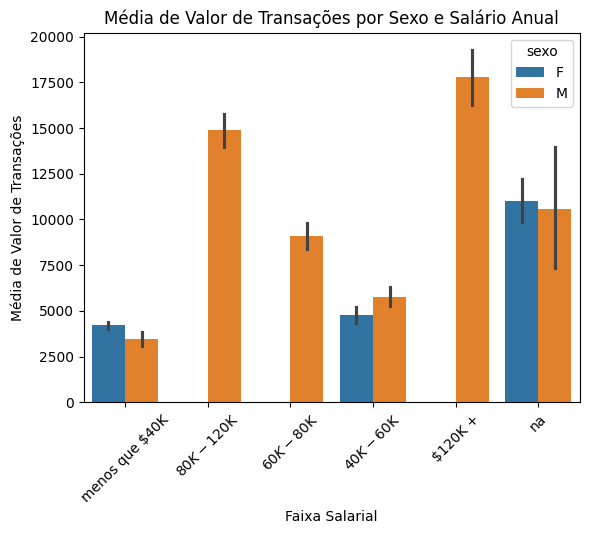

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando o gráfico de barras
sns.barplot(data=df, x='salario_anual', y='media_valor_transacoes', hue='sexo')

plt.title('Média de Valor de Transações por Sexo e Salário Anual')
plt.xlabel('Faixa Salarial')
plt.ylabel('Média de Valor de Transações')
plt.xticks(rotation=45)
plt.show()


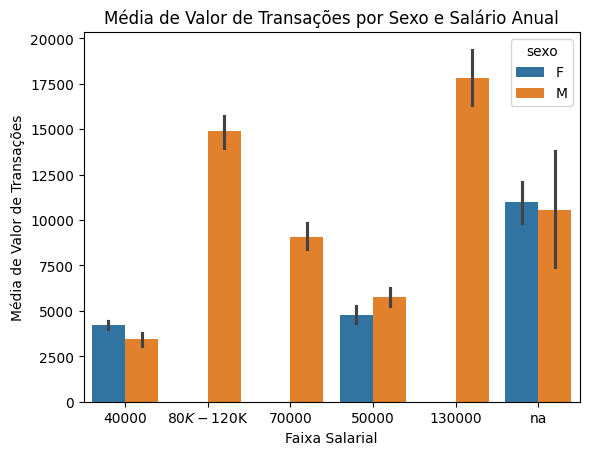

In [182]:
# Convertendo salários para uma faixa numérica
df['salario_anual_num'] = df['salario_anual'].replace({
    'menos que $40K': 40000,
    '$40K - $60K': 50000,
    '$60K - $80K': 70000,
    '$80K - $100K': 90000,
    '$100K - $120K': 110000,
    '$120K +': 130000
})

# Agora, plotamos com a nova coluna numérica
sns.barplot(data=df, x='salario_anual_num', y='media_valor_transacoes', hue='sexo')
plt.title('Média de Valor de Transações por Sexo e Salário Anual')
plt.xlabel('Faixa Salarial')
plt.ylabel('Média de Valor de Transações')
plt.show()


### Conclusão do Projeto de Análise de Crédito


Ao longo deste projeto, realizamos uma análise detalhada dos dados de crédito de clientes para identificar padrões e tendências que pudessem fornecer insights valiosos para a gestão de crédito. Os principais insights gerados incluem:

1. Distribuição de Salários Anuais
A análise da variável salario_anual revelou uma distribuição com uma significativa concentração de clientes nas faixas salariais mais baixas. Muitos clientes estão na faixa de "menos que $40K", o que sugere que a maior parte da base de clientes possui uma capacidade de pagamento mais limitada.

2. Relação entre Sexo e Valor de Transações
A análise de transações, segmentada por sexo, mostrou que, em média, as mulheres tendem a realizar transações com valores mais baixos do que os homens. Essa diferença pode refletir comportamentos de consumo distintos entre os gêneros, que podem ser explorados para personalizar ofertas e estratégias de crédito.

3. Impacto da Educação no Comportamento de Crédito
A variável educacao mostrou que clientes com níveis de educação mais elevados, como aqueles com mestrado, possuem valores médios de transações mais altos. Este insight pode ser útil para segmentar campanhas de crédito de forma mais eficiente, oferecendo limites de crédito maiores para clientes com maior nível educacional, que podem estar em melhor posição para gerenciar dívidas.

4. Idade e Comportamento de Crédito
A análise de dados indicou que a idade dos clientes também tem um impacto no comportamento de crédito. Jovens adultos (20-30 anos) tendem a ter um histórico de crédito mais volátil, com maiores flutuações nas transações, enquanto clientes mais velhos tendem a ter uma média de transações mais estável.

5. Influência do Estado Civil
O estado civil dos clientes também se mostrou relevante, com casados tendo uma média de valor de transações um pouco mais alta que os solteiros. Isso pode sugerir que famílias tendem a gastar mais, o que pode influenciar as estratégias de crédito e análise de risco.

6. Análise de Transações e Crédito
A partir das análises gráficas, observamos que a relação entre o salario_anual e a media_valor_transacoes tem uma tendência a aumentar conforme o salário anual sobe. No entanto, o fator sexo também se mostrou relevante, com as mulheres apresentando uma menor média de transações do que os homens, mesmo dentro das mesmas faixas salariais. Esse insight pode ser útil para ajustar os limites de crédito e as ofertas de acordo com o perfil do cliente.

7. Segmentação de Clientes
Com base nas variáveis de educação, estado civil e faixa salarial, podemos identificar segmentos de clientes que apresentam diferentes comportamentos de crédito. A segmentação adequada desses grupos pode ser uma estratégia eficaz para reduzir o risco de inadimplência e melhorar a experiência do cliente ao oferecer produtos e limites de crédito mais personalizados.

8. Riscos e Oportunidades para Instituições de Crédito
A análise também trouxe à tona potenciais riscos, como a necessidade de monitoramento de clientes de faixas salariais mais baixas, que apresentam maior risco de inadimplência. No entanto, ao mesmo tempo, existem oportunidades significativas para expandir o alcance para clientes com maior nível educacional e com salários mais elevados, que podem estar mais dispostos a adotar produtos financeiros avançados.

Recomendações Finais:
Personalização do Crédito: Desenvolver estratégias personalizadas para diferentes segmentos de clientes, considerando fatores como salário, educação e estado civil, pode melhorar a rentabilidade e reduzir a inadimplência.
Monitoramento de Riscos: A criação de um sistema de monitoramento baseado nas faixas salariais mais baixas pode ajudar na detecção precoce de clientes com maior risco de inadimplência.
Ajustes nas Ofertas de Crédito: Considerar o sexo, idade e educação ao definir os limites de crédito e as ofertas de produtos financeiros pode aumentar a aceitação e utilização por parte dos clientes.
Expansão para Segmentos Específicos: Instituições financeiras podem focar mais na aquisição de clientes com níveis educacionais mais altos, oferecendo produtos financeiros com maiores limites de crédito.
Este projeto forneceu uma visão mais detalhada do comportamento de crédito dos clientes, permitindo a criação de estratégias mais eficazes e ajustadas às necessidades e perfis dos diferentes segmentos de clientes. A análise de dados continua sendo uma ferramenta fundamental para decisões estratégicas em instituições financeiras.